# Agente Guloso para K-Armed-Bandits

In [2]:
import sys
sys.path.append('../')
import bandit #importa o ambient
import numpy as np

## Definindo a função argmax

In [3]:
def argmax(q_valores):
    """ (lista) -> índice de maior valor(int)
    Recebe uma lista dos q_valores e retorna o índice do maior valor. Por definição resolve empates escolhendo um deles aleatóriamente.
    """
    maior_valor = float("-inf")
    empates = []

    for i in range(len(q_valores)):
        if q_valores[i] > maior_valor:
            maior_valor = q_valores[i]
            empates = []
        if q_valores[i] == maior_valor:
            empates.append(i)

    return np.random.choice(empates) 

## Definindo o Agente

In [4]:
class AgenteGuloso(object):
    def __init__(self, k_bracos):
        self.contagem_bracos = np.zeros(k_bracos)
        self.q_valores = np.zeros(k_bracos)
        self.ultima_acao = argmax(self.q_valores)

    def agente_step(self, recompensa):
        """ (float) -> acao(int)
        Dá um step para o Agente atualizando os q_valores. Pega a recompensa do estado e retorna a ação escolhida.
        """ 

        self.contagem_bracos[self.ultima_acao] += 1
        step_size = 1/self.contagem_bracos[self.ultima_acao]
        q_atual = self.q_valores[self.ultima_acao] + step_size * (recompensa - self.q_valores[self.ultima_acao])
        self.q_valores[self.ultima_acao] = q_atual

        acao_atual = argmax(self.q_valores)

        return acao_atual

## Testando o Agente

In [5]:
import matplotlib.pyplot as plt

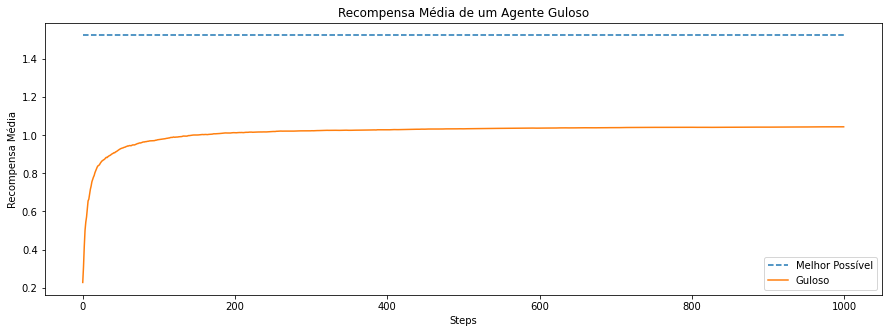

In [6]:
num_runs = 200
num_steps = 1000
np.random.seed(1)
total_medias = []

media_maxima = 0
for runs in range(num_runs):

    agente = AgenteGuloso(k_bracos=10)

    env = bandit.GaussianBandit(k_bracos=10)

    pontuacao = [0]
    medias = []

    media_maxima += np.max(env.bandits_expectations)

    for steps in range(num_steps):
        recompensa = env.gamble(agente.ultima_acao)
        agente.ultima_acao = agente.agente_step(recompensa)

        pontuacao.append(pontuacao[-1] + recompensa)
        medias.append(pontuacao[-1]/(steps+1))
    total_medias.append(medias)

plt.figure(figsize=(15,5))
plt.plot([media_maxima / num_runs for _ in range(num_steps)], linestyle="--")
plt.plot(np.mean(total_medias, axis=0))
plt.legend(["Melhor Possível", "Guloso"])
plt.title("Recompensa Média de um Agente Guloso")
plt.xlabel("Steps")
plt.ylabel("Recompensa Média")
plt.show()